In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Group_4 (1).zip to Group_4 (1) (1).zip


In [ ]:
import zipfile
import io

zip_file_path = list(uploaded.keys())[0]

with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_path]), 'r') as zip_ref:
    zip_ref.extractall('/content/Group_4 (1)(1).zip')


In [ ]:
path = '/content/Group_4 (1)(1).zip/Group_4/train'
train_datagen = ImageDataGenerator(rescale=1. / 255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')


Found 2150 images belonging to 5 classes.


In [ ]:
type(train)

keras.src.preprocessing.image.DirectoryIterator

In [ ]:
type(train_datagen)

keras.src.preprocessing.image.ImageDataGenerator

In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 5)
Image Size of first image :  (227, 227, 3)
Output of first image :  (5,)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1. 0. 0. 0. 0.]')

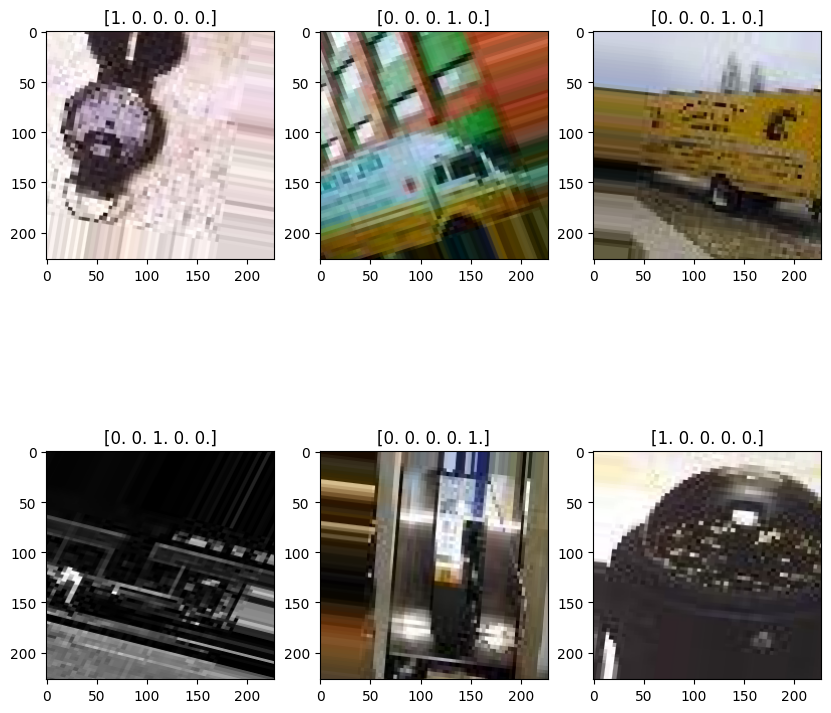

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
def AlexNet(input_shape):

    X_input = Input(input_shape)

    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)

    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)

    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)

    X = Flatten()(X)

    X = Dense(4096, activation = 'relu', name = "fc0")(X)

    X = Dense(4096, activation = 'relu', name = 'fc1')(X)

    X = Dense(5,activation='softmax',name = 'fc2')(X)

    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
# alex = AlexNet(train[0][0].shape[1:])
alex = AlexNet(train.image_shape)

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
alex.fit(train,epochs=55)

Epoch 1/55
68/68 [==============================] - 42s 434ms/step - loss: 8.4285 - accuracy: 0.2902
Epoch 2/55
68/68 [==============================] - 29s 421ms/step - loss: 1.4853 - accuracy: 0.3349
Epoch 3/55
68/68 [==============================] - 28s 419ms/step - loss: 1.4172 - accuracy: 0.3963
Epoch 4/55
68/68 [==============================] - 29s 423ms/step - loss: 1.3725 - accuracy: 0.4293
Epoch 5/55
68/68 [==============================] - 31s 462ms/step - loss: 1.2856 - accuracy: 0.4828
Epoch 6/55
68/68 [==============================] - 28s 412ms/step - loss: 1.2437 - accuracy: 0.4842
Epoch 7/55
68/68 [==============================] - 28s 403ms/step - loss: 1.2147 - accuracy: 0.5102
Epoch 8/55
68/68 [==============================] - 37s 522ms/step - loss: 1.1072 - accuracy: 0.5749
Epoch 9/55
68/68 [==============================] - 28s 415ms/step - loss: 1.1090 - accuracy: 0.5544
Epoch 10/55
68/68 [==============================] - 29s 422ms/step - loss: 1.0444 - accura

In [ ]:
path_test = '/content/Group_4 (1)(1).zip/Group_4/test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 250 images belonging to 5 classes.


In [ ]:
preds = alex.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

8/8 [==============================] - 3s 169ms/step - loss: 0.8213 - accuracy: 0.7320
Loss = 0.8213351368904114
Test Accuracy = 0.7319999933242798


In [ ]:

new_image_path = '/content/Group_4 (1)(1).zip/Group_4/train/limousine/n03670208_118.JPEG'
new_image = image.load_img(new_image_path, target_size=(227, 227))
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array /= 255.0


predictions = alex.predict(new_image_array)

predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 908ms/step
Predicted Class: 2


8/8 [==============================] - 0s 44ms/step


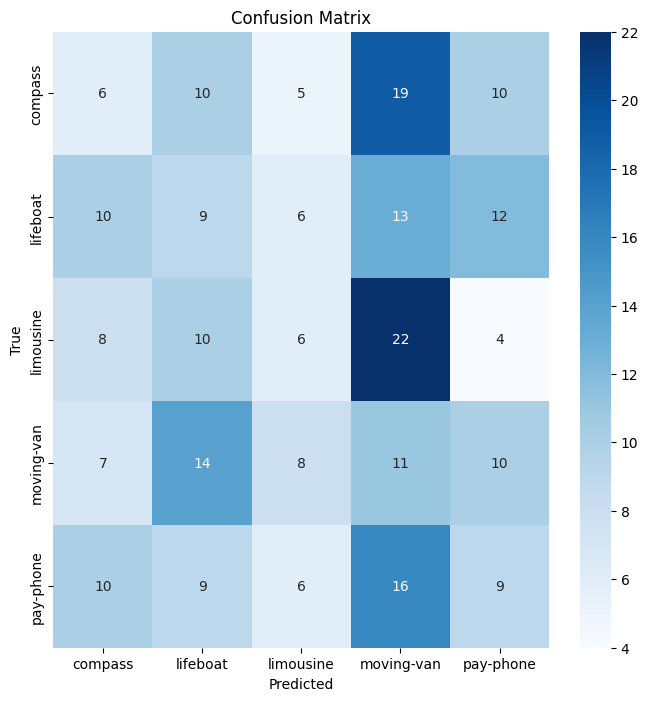

Classification Report:
              precision    recall  f1-score   support

     compass       0.15      0.12      0.13        50
    lifeboat       0.17      0.18      0.18        50
   limousine       0.19      0.12      0.15        50
  moving-van       0.14      0.22      0.17        50
   pay-phone       0.20      0.18      0.19        50

    accuracy                           0.16       250
   macro avg       0.17      0.16      0.16       250
weighted avg       0.17      0.16      0.16       250



In [ ]:
# Calculate confusion matrix and classification report
Y_pred = alex.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test.classes
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=test.class_indices)

# Display confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(),
            yticklabels=test.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)